In [3]:
import pandas as pd
import seaborn as sns


In [1]:

page_views_df = pd.read_csv('page_views_sample.csv')
documents_categories_df = pd.read_csv('documents_categories.csv')
documents_entities_df = pd.read_csv('documents_entities.csv')
documents_meta_df = pd.read_csv('documents_meta.csv')
documents_topics_df = pd.read_csv('documents_topics.csv')
events_df = pd.read_csv('events.csv')
promoted_content_df = pd.read_csv('promoted_content.csv')


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
promoted_content_df = pd.read_csv('promoted_content.csv')


In [26]:
promoted_content_df.head()

,ad_id,document_id,campaign_id,advertiser_id
0,1,6614,1,7
1,2,471467,2,7
2,3,7692,3,7
3,4,471471,2,7
4,5,471472,2,7


In [4]:
print(len(page_views_df),
len(documents_categories_df),
len(documents_entities_df),
len(documents_meta_df),
len(documents_topics_df),
len(events_df),
len(promoted_content_df),
len(clicks_train_df))


9999999 5481475 5537552 2999334 11325960 23120126 559583 87141731


In [2]:
clicks_train_df = pd.read_csv('clicks_train.csv')

In [74]:
clicks_train_df.loc[clicks_train_df['display_id'] == 3]
 

,display_id,ad_id,clicked
10,3,71547,0
11,3,95814,0
12,3,152141,0
13,3,183846,0
14,3,228657,1
15,3,250082,0


In [47]:
page_views_df.head()



,uuid,document_id,timestamp,platform,geo_location,traffic_source
0,1fd5f051fba643,120,31905835,1,RS,2
1,8557aa9004be3b,120,32053104,1,VN>44,2
2,c351b277a358f0,120,54013023,1,KR>12,1
3,8205775c5387f9,120,44196592,1,IN>16,2
4,9cb0ccd8458371,120,65817371,1,US>CA>807,2


In [73]:
documents_categories_df.head()


,document_id,category_id,confidence_level
0,1595802,1611,0.92
1,1595802,1610,0.07
2,1524246,1807,0.92
3,1524246,1608,0.07
4,1617787,1807,0.92


In [69]:
documents_entities_df.head()

,document_id,entity_id,confidence_level
0,1524246,f9eec25663db4cd83183f5c805186f16,0.672865
1,1524246,55ebcfbdaff1d6f60b3907151f38527a,0.399114
2,1524246,839907a972930b17b125eb0247898412,0.392096
3,1524246,04d8f9a1ad48f126d5806a9236872604,0.213996
4,1617787,612a1d17685a498aff4f036c1ee02c16,0.386193


In [37]:
documents_topics_df.head()

,document_id,topic_id,confidence_level
0,1595802,140,0.073113
1,1595802,16,0.059416
2,1595802,143,0.045421
3,1595802,170,0.038867
4,1524246,113,0.196450


In [51]:
documents_meta_df.head()

,document_id,source_id,publisher_id,publish_time
0,1595802,1.0,603.0,2016-06-05 00:00:00
1,1524246,1.0,603.0,2016-05-26 11:00:00
2,1617787,1.0,603.0,2016-05-27 00:00:00
3,1615583,1.0,603.0,2016-06-07 00:00:00
4,1615460,1.0,603.0,2016-06-20 00:00:00


In [71]:
events_df.head()

,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US>SC>519
1,2,79a85fa78311b9,1794259,81,2,US>CA>807
2,3,822932ce3d8757,1179111,182,2,US>MI>505
3,4,85281d0a49f7ac,1777797,234,2,US>WV>564
4,5,8d0daef4bf5b56,252458,338,2,SG>00


In [43]:
promoted_content_df.head()

,ad_id,document_id,campaign_id,advertiser_id
0,1,6614,1,7
1,2,471467,2,7
2,3,7692,3,7
3,4,471471,2,7
4,5,471472,2,7


In [97]:
# Document category EDA

print(documents_categories_df.head())

# 97 unique categories
print("Number of unique categories: ", len(documents_categories_df['category_id'].unique()))


print("Number of unique documents : ", len(documents_categories_df['document_id'].unique()))



   document_id  category_id  confidence_level
0      1595802         1611              0.92
1      1595802         1610              0.07
2      1524246         1807              0.92
3      1524246         1608              0.07
4      1617787         1807              0.92
5481475
Number of unique categories:  97
Number of unique documents :  2828649


In [244]:
cat_value_counts = documents_categories_df.groupby('category_id')['document_id'].count().sort_values()

doc_value_counts = documents_categories_df.groupby('document_id')['category_id'].count()


print(round((doc_value_counts <= 2).mean() * 100, 2))

# all documents belong to maximum 2 categories
# 93.78% documents belong to 2 categories, rest belong to 1 category.

cat_value_counts

100.0


category_id
1700         1
1400         1
1500         2
1600         3
1900         5
2000         6
1200         7
1800         8
1308       473
1905      1448
1911      1465
1307      1506
1605      2094
1516      2454
1507      2569
1704      2861
1509      2941
1202      3259
1208      3575
1804      3632
1915      4835
1211      4871
2005      4998
1000      5074
1305      5426
1705      6553
1304      6660
1206      7523
1802      7586
1910      7885
         ...  
1406     54394
1402     54763
1909     55729
1503     57335
1608     57479
1514     60131
1609     63995
1405     64063
1604     67342
1806     68248
1602     74315
1603     77881
1510     83877
1703     93883
1903     95015
1205    103539
1706    105170
1407    124783
2100    125219
1707    136830
1708    142908
1408    155883
2004    159334
1907    181345
1100    212249
1808    241966
1513    276203
1902    292878
1702    408499
1403    572107
Name: document_id, Length: 97, dtype: int64

Count of documents in a certain category less than 1000 : 9.28%
Count of documents in a certain category less than 5000 : 23.71%
Count of documents in a certain category less than 10000 : 32.99%
Count of documents in a certain category less than 100000 : 84.54%


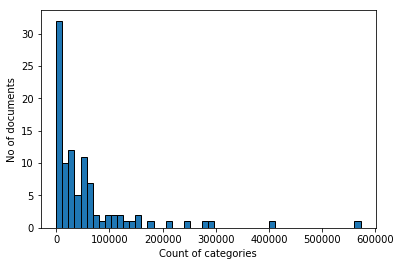

In [245]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
plt.ylabel('No of documents');
plt.xlabel('Count of categories');
out = plt.hist(cat_value_counts.values,histtype='bar', bins=50, ec='black');

# looking at the distribution of categories
for i in [1000,5000,10000, 100000]:
    print("Count of documents in a certain category less than {} : {}%".format(i,round((cat_value_counts < i).mean() * 100, 2)))

100.0
Total number of unique entities:  1326009
Count of documents that belong to a certain entity less than 2 : 72.78%
Count of documents that belong to a certain entity less than 10 : 96.05%
Count of documents that belong to a certain entity less than 100 : 99.63%
Count of documents that belong to a certain entity less than 1000 : 99.98%
Count of documents that belong to a certain entity less than 2000 : 99.99%


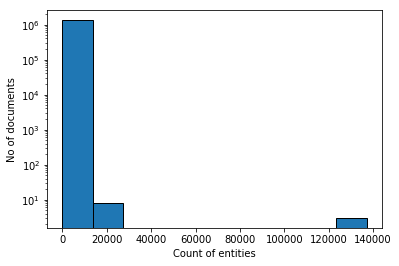

In [6]:
documents_entities_df = pd.read_csv('documents_entities.csv')

entity_value_counts = documents_entities_df.groupby('entity_id')['document_id'].count()

doc_ent_value_counts = documents_entities_df.groupby('document_id')['entity_id'].count()

# Documents belong to max 10 entities
print(round((doc_ent_value_counts <= 10).mean() * 100, 2))

print("Total number of unique entities: ", len(documents_entities_df.entity_id.unique()))

for i in [2,10,100, 1000, 2000]:
    print("Count of documents that belong to a certain entity less than {} : {}%".format(i,round((entity_value_counts < i).mean() * 100, 2)))
    
plt.ylabel('No of documents')
plt.xlabel('Count of entities')
out = plt.hist(entity_value_counts.values,histtype='bar',log=True, bins=10, ec='black')


In [268]:
category_values_per_platform = doc_events_merge.groupby(['category_id','platform'])

In [240]:
page_views_df.head()

,uuid,document_id,timestamp,platform,geo_location,traffic_source
0,1fd5f051fba643,120,31905835,1,RS,2
1,8557aa9004be3b,120,32053104,1,VN>44,2
2,c351b277a358f0,120,54013023,1,KR>12,1
3,8205775c5387f9,120,44196592,1,IN>16,2
4,9cb0ccd8458371,120,65817371,1,US>CA>807,2


92.88


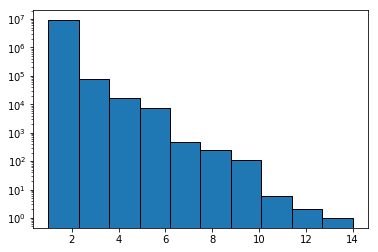

In [4]:
# Page views EDA
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
page_views_df = pd.read_csv('page_views_sample.csv')

pv_uuid_count = page_views_df.groupby('uuid')['uuid'].count()

# ~93% of the users in the page views is unique, probably can skip this column for prediction
print(round((pv_uuid_count < 2).mean() * 100, 2))
out = plt.hist(pv_uuid_count.values,histtype='bar',log=True, ec='black')
plt.xlabel('No of users')
plt.ylabel('Count of users')


NameError: name 'plt' is not defined

In [308]:
# convert page views to have only country data 
page_views_df['geo_location'] = page_views_df['geo_location'].apply(lambda x: (str(x).split(">")[0]))


235
['--' 'A1' 'A2' 'AD' 'AE' 'AF' 'AG' 'AI' 'AL' 'AM' 'AN' 'AO' 'AP' 'AR'
 'AS' 'AT' 'AU' 'AW' 'AX' 'AZ' 'BA' 'BB' 'BD' 'BE' 'BF' 'BG' 'BH' 'BI'
 'BJ' 'BM' 'BN' 'BO' 'BR' 'BS' 'BT' 'BW' 'BY' 'BZ' 'CA' 'CD' 'CF' 'CG'
 'CH' 'CI' 'CK' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CV' 'CY' 'CZ' 'DE' 'DJ'
 'DK' 'DM' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ER' 'ES' 'ET' 'EU' 'FI' 'FJ' 'FK'
 'FM' 'FO' 'FR' 'FX' 'GA' 'GB' 'GD' 'GE' 'GF' 'GG' 'GH' 'GI' 'GL' 'GM'
 'GN' 'GP' 'GQ' 'GR' 'GT' 'GU' 'GW' 'GY' 'HK' 'HN' 'HR' 'HT' 'HU' 'ID'
 'IE' 'IL' 'IM' 'IN' 'IO' 'IQ' 'IR' 'IS' 'IT' 'JE' 'JM' 'JO' 'JP' 'KE'
 'KG' 'KH' 'KI' 'KM' 'KN' 'KR' 'KW' 'KY' 'KZ' 'LA' 'LB' 'LC' 'LI' 'LK'
 'LR' 'LS' 'LT' 'LU' 'LV' 'LY' 'MA' 'MC' 'MD' 'ME' 'MF' 'MG' 'MH' 'MK'
 'ML' 'MM' 'MN' 'MO' 'MP' 'MQ' 'MR' 'MS' 'MT' 'MU' 'MV' 'MW' 'MX' 'MY'
 'MZ' 'NA' 'NC' 'NE' 'NG' 'NI' 'NL' 'NO' 'NP' 'NR' 'NU' 'NZ' 'OM' 'PA'
 'PE' 'PF' 'PG' 'PH' 'PK' 'PL' 'PM' 'PR' 'PS' 'PT' 'PW' 'PY' 'QA' 'RE'
 'RO' 'RS' 'RU' 'RW' 'SA' 'SB' 'SC' 'SD' 'SE' 'SG' 'SI' 'SK' 'SL' 'SM'
 '

<BarContainer object of 235 artists>

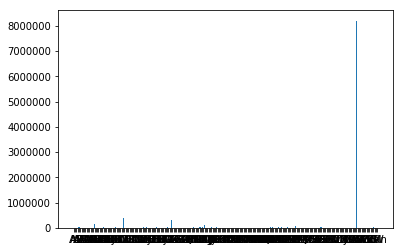

In [314]:
print(len(page_views_df['geo_location'].unique()))

countries = np.sort(page_views_df['geo_location'].unique())
print(countries)
country_count = page_views_df.groupby('geo_location')['geo_location'].count()
plt.bar(countries, country_count.values)

traffic_source
1    6668961
2    1667170
3    1663868
Name: uuid, dtype: int64


Text(0,0.5,'No of views')

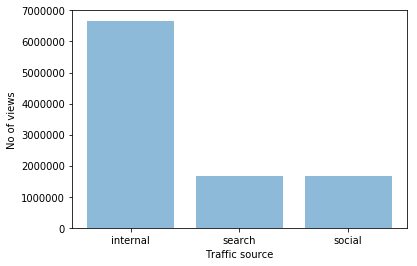

In [325]:
pv_traffic_source_count = page_views_df.groupby('traffic_source')['uuid'].count()
print(pv_traffic_source_count)

traffic_source = np.sort(page_views_df.traffic_source.unique())
traffic_source = ['internal', 'search', 'social']
plt.bar(traffic_source, pv_traffic_source_count.values, align='center', alpha=0.5)
plt.xlabel('Traffic source')
plt.ylabel('No of views')
# for traffic source, 

platform
1    4403345
2    4678799
3     917855
Name: uuid, dtype: int64


Text(0,0.5,'No of views')

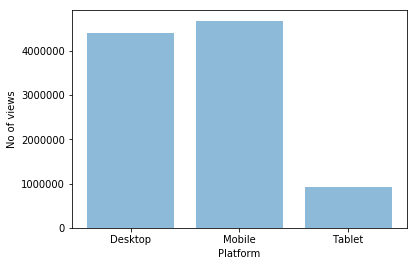

In [327]:
pv_platform_count = page_views_df.groupby('platform')['uuid'].count()
print(pv_platform_count)

platform = np.sort(page_views_df.platform.unique())
platform = ['Desktop', 'Mobile', 'Tablet']
plt.bar(platform, pv_platform_count.values, align='center', alpha=0.5)
plt.xlabel('Platform')
plt.ylabel('No of views')


In [85]:
#Libraries
import numpy as np # to perform algebric calculations
import pandas as pd # data processing-input as pandas dataframe
import os
import gc # To clean memory
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


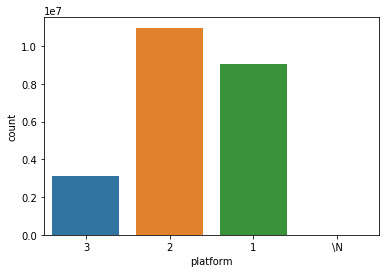

In [31]:
%matplotlib inline
events_df.platform = events_df.platform.astype(str)
sns.countplot(x="platform", data=events_df)

In [17]:
events_df.isnull().sum()


Unnamed: 0      0
display_id      0
uuid            0
document_id     0
timestamp       0
platform        0
geo_location    0
dtype: int64

In [15]:
# Events has geo_location which has null entries.
#Lets modify those entries to have the highest frequency entries and write them back to the file.
events_df = pd.read_csv('events.csv')
print(events_df.isnull().sum())
events_df = events_df.fillna(events_df.geo_location.value_counts().index[0])
print(events_df.isnull().sum())
events_df.to_csv('events.csv', index=False)

# Transform the documents_to_* datasets to include only those relations ships where we have higher confidence(80%).


In [66]:
documents_categories_df = pd.read_csv('documents_categories.csv')
print(len(documents_categories_df))
documents_categories_df = documents_categories_df[documents_categories_df.confidence_level > 0.8]
print(len(documents_categories_df))
documents_categories_df = documents_categories_df.drop(['confidence_level'],axis=1)
documents_categories_df.to_csv('modified_documents_categories.csv', index=False)

5481475
1387834


In [67]:
documents_entities_df = pd.read_csv('documents_entities.csv')
print(len(documents_entities_df))
documents_entities_df = documents_entities_df[documents_entities_df.confidence_level > 0.8]
print(len(documents_entities_df))
documents_entities_df = documents_entities_df.drop(['confidence_level'],axis=1)
documents_entities_df.to_csv('modified_documents_entities.csv', index=False)

5537552
805145


In [68]:
documents_topics_df = pd.read_csv('documents_topics.csv')
print(len(documents_topics_df))
documents_topics_df = documents_topics_df[documents_topics_df.confidence_level > 0.8]
print(len(documents_topics_df))
documents_topics_df = documents_topics_df.drop(['confidence_level'],axis=1)
documents_topics_df.to_csv('modified_documents_topics.csv', index=False)

11325960
502


In [69]:
page_views_df = pd.read_csv('page_views_sample.csv')
print(page_views_df.isnull().sum())
page_views_df = page_views_df.fillna(page_views_df.geo_location.value_counts().index[0])
print(page_views_df.isnull().sum())
page_views_df.to_csv('page_views_sample.csv', index=False)

uuid              0
document_id       0
timestamp         0
platform          0
geo_location      0
traffic_source    0
dtype: int64
uuid              0
document_id       0
timestamp         0
platform          0
geo_location      0
traffic_source    0
dtype: int64
